## Numpy Fundamentals

In [1]:
import numpy as np

In [11]:
mylist = [12.3,1.56,34.54,19.01]
my_array = np.array(mylist)
my_array[1::2] #slicing using strides

array([ 1.56, 19.01])

In [12]:
my_array.shape

(4,)

In [13]:
my_col_vector= my_array.reshape(4,1) #convert to column matrix
my_col_vector

array([[12.3 ],
       [ 1.56],
       [34.54],
       [19.01]])

In [14]:
my_array.reshape(1,4) #convert to row matrix

array([[12.3 ,  1.56, 34.54, 19.01]])

In [6]:
print(my_col_vector.T) # Alternatively take the transponse

[[12.3   1.56 34.54 19.01]]


### Selecting elements

In [15]:
# The traditional approach
my_indexes = []
for ind,i in enumerate(mylist):
    if i > 14:
        my_indexes.append(ind)
print(my_indexes)
print(my_array[my_indexes])

[2, 3]
[34.54 19.01]


In [16]:
# Using the more efficient numpy based approach
bool_vals = my_array > 14
print(bool_vals)
my_array[bool_vals]

[False False  True  True]


array([34.54, 19.01])

### Matrix Multiplication

In [18]:
my_reshaped_array = my_array.reshape(2,2)
my_reshaped_array

array([[12.3 ,  1.56],
       [34.54, 19.01]])

In [19]:
my_col_vector = np.array([2.3,3.1]).reshape(2,1)
print(my_col_vector)

[[2.3]
 [3.1]]


In [20]:
my_reshaped_array.dot(my_col_vector)

array([[ 33.126],
       [138.373]])

### Element wise operations

In [12]:
my_reshaped_array*my_col_vector.T

array([[28.29 ,  4.836],
       [79.442, 58.931]])

In [13]:
my_reshaped_array*my_col_vector

array([[ 28.29 ,   3.588],
       [107.074,  58.931]])

In [14]:
#Notice we didnt need the matrices to be the same shape. This is an example of broadcasting where 
#the smaller matrix is replicated to match the bigger matrices shape. Of course you can still have 
#shape compatibility

In [15]:
my_col_vector1 = np.array([1,2,3,4]).reshape(4,1)
my_reshaped_array*my_col_vector1.T

ValueError: operands could not be broadcast together with shapes (2,2) (1,4) 

In [16]:
my_reshaped_array-my_col_vector

array([[10.  , -0.74],
       [31.44, 15.91]])

In [17]:
my_reshaped_array/my_col_vector

array([[ 5.34782609,  0.67826087],
       [11.14193548,  6.13225806]])

In [18]:
my_reshaped_array+my_col_vector

array([[14.6 ,  3.86],
       [37.64, 22.11]])

### Random Number Arrays

In [19]:
my_rand_array1 = np.random.rand(5)
my_rand_array2 = np.random.rand(5)
print(my_rand_array1)
print(my_rand_array2)

[0.04845792 0.19950057 0.01510447 0.70601476 0.76605492]
[0.94029973 0.65194148 0.47453976 0.0184357  0.62592487]


In [20]:
np.logical_and(my_rand_array1 > my_rand_array2,np.logical_and(my_rand_array1 > 0.5,my_rand_array2 > 0.5))

array([False, False, False, False,  True])

In [21]:
my_2d_array = np.array([my_rand_array1,my_rand_array2])
my_2d_array

array([[0.04845792, 0.19950057, 0.01510447, 0.70601476, 0.76605492],
       [0.94029973, 0.65194148, 0.47453976, 0.0184357 , 0.62592487]])

In [22]:
# Accessing all elements
for v in np.nditer(my_2d_array):
    print(v)

0.048457917958908636
0.1995005664158993
0.015104472879428954
0.7060147637093386
0.766054921552709
0.9402997324298404
0.6519414803021805
0.4745397570815253
0.018435697698403808
0.6259248703371054


### Random Walk Question
Say you are standing at the bottom of a staircase with a a dice. With each throw of the dice you either move down one step (if you get a 1 or 2 on the dice) or move up one step (if you get a 3, 4 or 5 on the dice). If you throw a 6 on the dice, you throw the dice again and move up the staircase by the number you get on that second throw. Note if you are on the base of the staircase you cannot move down! What is the probability that you will reach more that 60 steps after 250 throws of the dice.

1. Change the code so that you have a function that takes as parameter, the number of throws
2. Add a new parameter to the function that takes a probability distribution over all outcomes from a dice throw. For example (0.2,0.3,0.2,0.1,0.1,0.1) would suggest that the probability of getting a 1 is 0.2, 2 is 0.3 etc. How does that change the probability of reaching a step higher than 60?

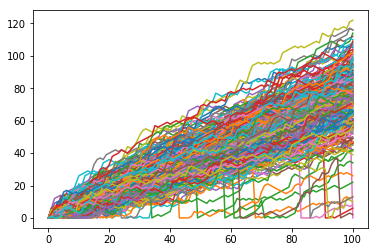

In [23]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)
all_walks = []

# Simulate random walk 250 times
for i in range(250) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Implement clumsiness
        if np.random.rand() < 0.001 :
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()

Probability of reaching 60 steps in 100 tosses is 0.784


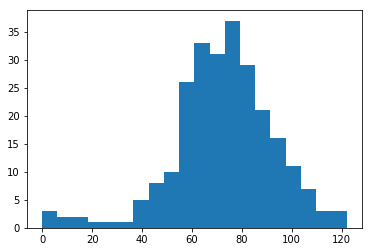

In [24]:
ends = np_aw_t[-1,:]
print("Probability of reaching 60 steps in 100 tosses is "+str(sum(ends >= 60)/len(ends)))

plt.hist(ends,bins=20)
plt.show()


### Implementing Linear Regression Using Numpy

In [1]:
# Generate Data
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline
np.random.seed(42)
sample_size = 1000
num_attrs = 2

x_data = np.random.rand(num_attrs*sample_size).reshape(sample_size,num_attrs)

my_ones = np.ones(sample_size).reshape(sample_size,1)
noise = np.random.randn(len(x_data))
print(noise)
input_data = np.concatenate((my_ones,x_data),axis=1)
print(input_data.shape)
print(np.mean(noise**2))
betas = np.random.rand(num_attrs+1)
print(betas)
y_true=input_data.dot(betas)+noise
print(noise.shape)
print(len(x_data))
print(betas.shape)

np.savetxt("x.csv", input_data, delimiter=",")
np.savetxt("y.csv", y_true, delimiter=",")

[-8.77982587e-01 -8.26880354e-01 -2.26478892e-01  3.67365507e-01
  9.13584626e-01 -8.03178951e-01  1.49268857e+00 -2.71123601e-01
 -2.13672943e-02 -7.47211679e-01 -2.42424026e+00  8.84045396e-01
  7.36843897e-01 -2.81327557e-01  6.69907172e-02  5.15939218e-01
 -1.56254586e+00 -5.29052677e-01  7.94264680e-01 -1.25428942e+00
  2.93557932e-01 -1.35658180e+00  4.66429982e-01 -3.56414823e-02
 -1.61513182e+00  1.16473935e+00 -7.34591577e-01 -8.10252437e-01
  2.00569197e-01  1.14863735e+00 -1.01582182e+00  6.16798498e-02
  4.28816500e-01  6.93105607e-01  1.76441555e-01 -3.67027839e-01
 -8.27590221e-01  8.61438830e-02 -1.07213901e+00 -2.92135048e+00
  4.36559804e-01  9.03934841e-01 -2.36293244e+00 -1.00973070e+00
  6.19154261e-01  2.05749547e+00  2.07937077e-02 -7.28002941e-01
 -1.82896441e-01  1.37487642e+00 -6.45964179e-01 -7.99192007e-01
 -4.82743522e-01 -9.53328608e-01  1.22670316e-01  1.62467846e+00
  3.23079273e-01 -2.52353502e-01 -2.91811269e-01 -1.56319081e+00
  8.83109777e-01 -7.78371


plt.scatter(x_data[:,1],y_true)
plt.xlabel('X')
plt.ylabel('Y')



In [3]:
input_data.shape

(1000, 3)

In [7]:
import math

coeffs = np.random.randn(input_data.shape[1]).reshape(input_data.shape[1],1)
print(coeffs)

step_size = 0.01
rmse = -1
for epoch in range(10000):
    old_rmse = rmse
    y_pred = input_data.dot(coeffs)
    error = y_true.reshape(len(x_data),1)-y_pred
    rmse = math.sqrt(error.T.dot(error)/input_data.shape[0])
    
    if abs(rmse-old_rmse) < 0.000000000001:
        break
    
    derivative = 2*error.T.dot(input_data)/input_data.shape[0]
    coeffs = coeffs+step_size*derivative.T
print(coeffs)
print(rmse)

[[-0.24123107]
 [ 0.54887884]]
[[1.17924083]
 [1.13842949]]
1.0082204844101537


In [6]:
# Verify result by using linear regression as implmented in sklearn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

input_data = x_data

# Train the model using the training sets
regr.fit(input_data, y_true)

# Make predictions using the testing set
y_pred = regr.predict(input_data)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.4f"
      % mean_squared_error(y_true, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_true, y_pred))

Coefficients: 
 [0.65501581 0.5413493 ]
Intercept: 
 0.655820560247225
Mean squared error: 0.9536
Variance score: 0.06


### Implementing K-means: Using Tensors

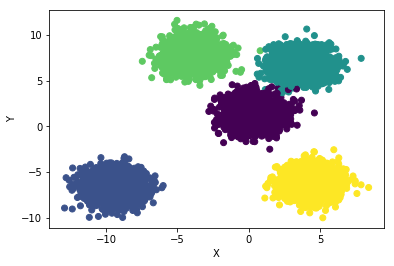

In [30]:
# Generate Data
import sklearn.datasets as data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

num_samples = 10000
num_clusters = 5

from sklearn.preprocessing import MinMaxScaler
def drawscatter(myData):
    scaled_data = myData[0]
    plt.scatter(scaled_data[:,0],scaled_data[:,1],c=myData[1])
    plt.xlabel('X')
    plt.ylabel('Y')
    
gaussians_data=data.make_blobs(n_samples = num_samples, n_features=2,centers = num_clusters,random_state = 101)
drawscatter(gaussians_data)

In [31]:
k=num_clusters
centroids = np.random.randn(gaussians_data[0].shape[1]*k).reshape(1,k,gaussians_data[0].shape[1])
centroids

array([[[ 1.00170337,  1.53710311],
        [-2.04738882,  0.31872512],
        [ 0.16227371, -0.00704279],
        [-1.03712063,  2.02175998],
        [-0.03868715, -0.87244246]]])

In [32]:
def euclidean_distance(mat1,mat2):
    diff = mat1.reshape(mat1.shape[0],1,mat1.shape[1]) - mat2
    distances = np.sum(diff**2,axis=2)
    return distances**0.5

def compute_new_centroids(data,allocations):
    new_centroids = []
    cluster_size = []
    for ind in range(k):
        cluster_size.append(sum(allocations == ind)[0])
        if cluster_size[-1] > 0:
            new_centroids.append(np.sum(data*(allocations == ind),axis=0)/cluster_size[-1])
        else:
            new_centroids.append(np.random.randn(gaussians_data[0].shape[1]))
    return np.array(new_centroids),cluster_size

In [33]:
num_iterations = 5000
threshold = 0.000001
for i in range(num_iterations):
    distances = euclidean_distance(gaussians_data[0],centroids)
    allocations = np.argmin(distances,axis=1).reshape(distances.shape[0],1)
    new_centroids,c_size = compute_new_centroids(gaussians_data[0],allocations)
    print(new_centroids)
    print(c_size)
    delta_centroids = np.sum(np.sum((new_centroids - centroids)**2,axis=1)**0.5)/k
    if delta_centroids < threshold:
        break
    print(delta_centroids)
    centroids = new_centroids

[[ 2.84447361  5.03162897]
 [-9.12438031 -6.30113929]
 [ 0.28166495  0.31044763]
 [-3.21994228  6.75784232]
 [ 4.28662579 -6.08564231]]
[2982, 2078, 383, 2494, 2063]
3.8112444543373902
[[ 3.59871848  6.52020827]
 [-9.41957581 -6.56712574]
 [ 0.32991797  1.31498646]
 [-3.8764261   7.85826725]
 [ 4.41999847 -6.25021541]]
[2107, 2000, 1890, 2003, 2000]
0.9130016389847437
[[ 3.71457432  6.69168716]
 [-9.41957581 -6.56712574]
 [ 0.37840205  1.41649102]
 [-3.88099675  7.86625258]
 [ 4.41999847 -6.25021541]]
[2004, 2000, 1997, 1999, 2000]
0.0657277254585864
[[ 3.71564392  6.69478743]
 [-9.41957581 -6.56712574]
 [ 0.38066869  1.41866394]
 [-3.88099675  7.86625258]
 [ 4.41999847 -6.25021541]]
[2002, 2000, 1999, 1999, 2000]
0.0012839056510063295
[[ 3.71564392  6.69478743]
 [-9.41957581 -6.56712574]
 [ 0.38066869  1.41866394]
 [-3.88099675  7.86625258]
 [ 4.41999847 -6.25021541]]
[2002, 2000, 1999, 1999, 2000]


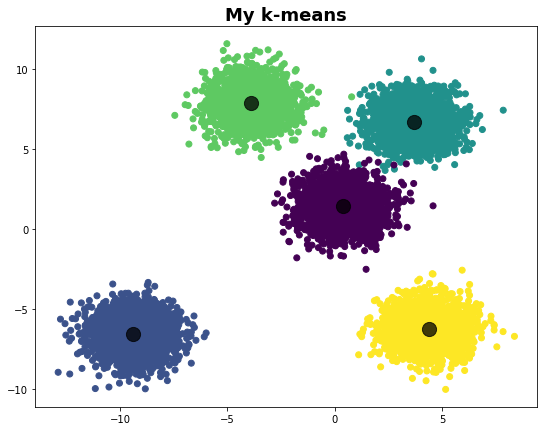

In [34]:
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(gaussians_data[0][:, 0], gaussians_data[0][:, 1], c=gaussians_data[1])
ax.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.75)
plt.title('My k-means', fontsize=18, fontweight='demi')

[[ 4.41999847 -6.25021541]
 [-3.88099675  7.86625258]
 [-9.41957581 -6.56712574]
 [ 3.71564392  6.69478743]
 [ 0.38066869  1.41866394]]


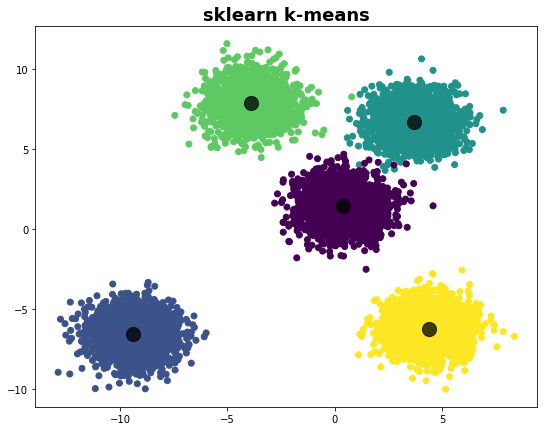

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k)
X=gaussians_data[0]
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# visualize prediction
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(X[:, 0], X[:, 1], c=gaussians_data[1])

# get centers for plot
centers = kmeans.cluster_centers_
print(centers)
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
plt.title('sklearn k-means', fontsize=18, fontweight='demi')

In [ ]:
## Now try and remove the for loop in compute_new_centroids